In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from preprocessing import preprocessing

In [2]:
df = pd.read_csv("marketing_campaign.csv",sep="\t")

2233


### Overall 

In [156]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [157]:
for idx, value in enumerate(df.duplicated()):
    if value == True:
        print(idx, value)

df.drop_duplicates(inplace=True)

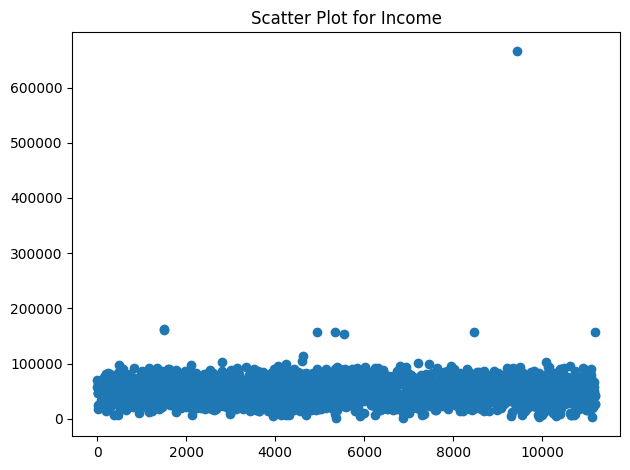

In [158]:
plt.scatter(df['ID'], df['Income'])
plt.title('Scatter Plot for Income')
plt.tight_layout()
plt.show()

In [159]:
for idx, value in enumerate(df['Income']):
    if value == df['Income'].max():
        print(idx)

2233


In [160]:
df = df.drop(index=2233)

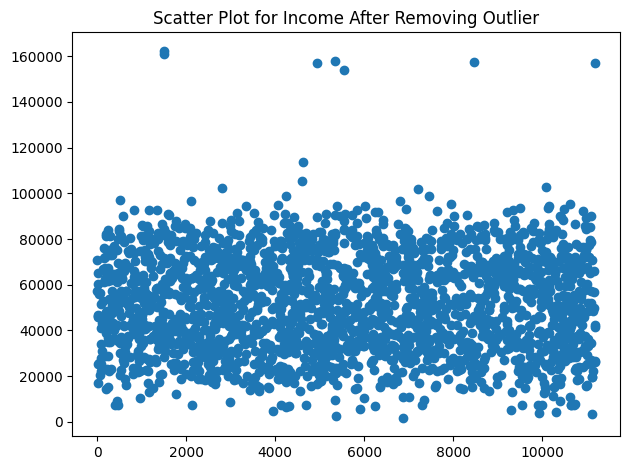

In [161]:
plt.scatter(df['ID'], df['Income'])
plt.title('Scatter Plot for Income After Removing Outlier')
plt.tight_layout()
plt.show()

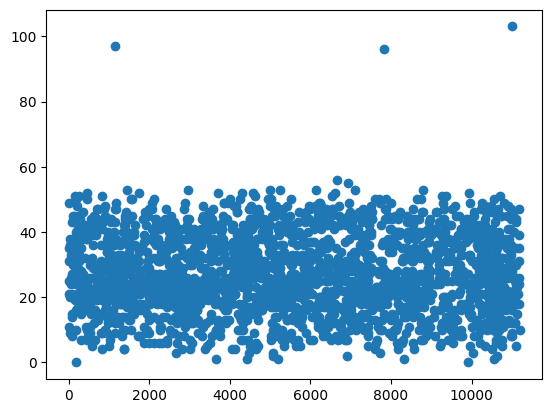

In [162]:
df['Age'] = df['Year_Birth'].max() - df['Year_Birth']
plt.scatter(df['ID'], df['Age'])

#### Drop the age is over 85 years, focusing on general consumer behavior

In [163]:
df = df[df['Age']<=85]

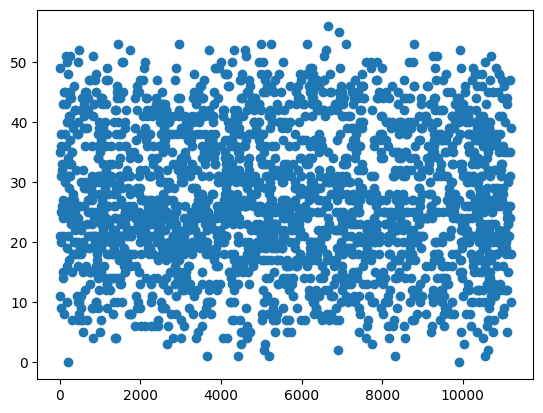

In [164]:
plt.scatter(df['ID'], df['Age'])

### Data preprocessing

#### Format

In [165]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

In [166]:
df['Tenure'] = (df['Dt_Customer'].max() - df['Dt_Customer']).dt.days

#### Missing values

In [167]:
income_mean = df['Income'].mean()
df['Income'] = df['Income'].fillna(income_mean)

### Exploratory Data Analysis

#### Sturges' rule

In [174]:
bins = int(1 + 3.322 * np.log10(len(df)))
bins

12

#### Histrogram: Distribution of Age

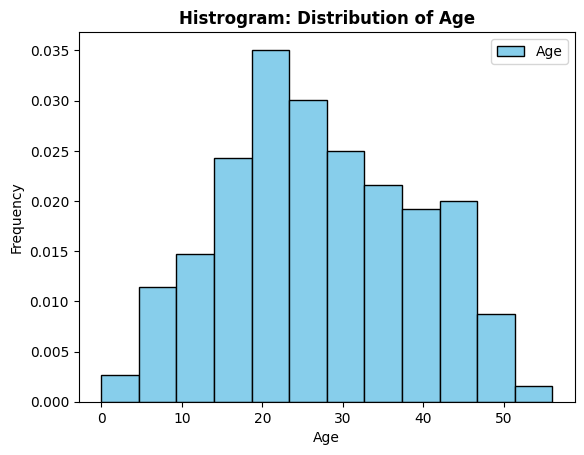

In [198]:
plt.hist(df['Age'], bins=12, density=True, color='skyblue', ec='black', label='Age')
plt.title("Histrogram: Distribution of Age", fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#### Pie Chart

In [208]:
education_array = np.array(df['Education'].value_counts())
education_labels = df['Education'].value_counts().index

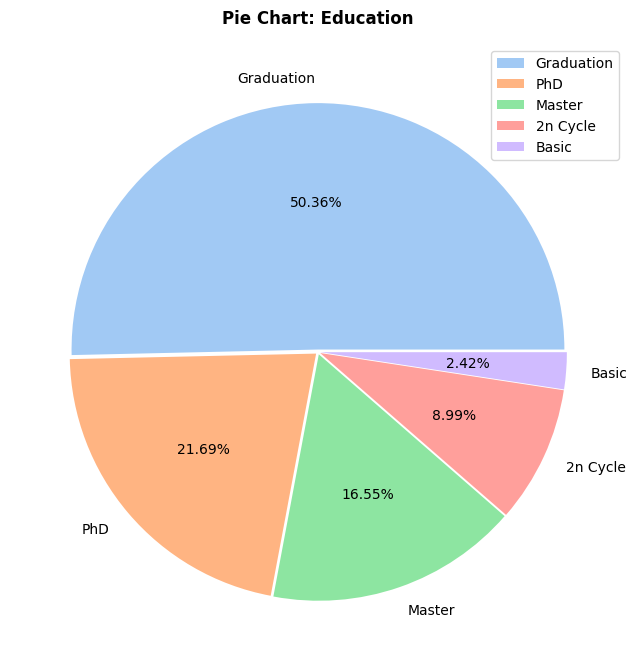

In [253]:
colors = sns.color_palette('pastel')
plt.figure(figsize=(12,8))
plt.pie(education_array, labels=education_labels, colors=colors, autopct='%.2f%%', labeldistance=1.1, explode=[0.01, 0.01, 0.01, 0.01 , 0.01])
plt.title("Pie Chart: Education", fontweight='bold', pad=15)
plt.legend()
plt.show()